In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("cleaned_data/combined_bus_silverline_2017_2024.csv")

In [5]:
df.head()

,year,date,route_or_line,ridership_total,ridership_average
0,2017,2017-01-01 05:00:00+00:00,Bus,8003644.0,242534.0
1,2017,2017-02-01 05:00:00+00:00,Bus,7301412.0,260764.0
2,2017,2017-03-01 05:00:00+00:00,Bus,8595017.0,277259.0
3,2017,2017-04-01 04:00:00+00:00,Bus,8098478.0,269949.0
4,2017,2017-05-01 04:00:00+00:00,Bus,8817889.0,284448.0


In [6]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   year               192 non-null    int64              
 1   date               192 non-null    datetime64[ns, UTC]
 2   route_or_line      192 non-null    object             
 3   ridership_total    192 non-null    float64            
 4   ridership_average  192 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(1)
memory usage: 7.6+ KB
None
   year                      date route_or_line  ridership_total  \
0  2017 2017-01-01 05:00:00+00:00           Bus        8003644.0   
1  2017 2017-02-01 05:00:00+00:00           Bus        7301412.0   
2  2017 2017-03-01 05:00:00+00:00           Bus        8595017.0   
3  2017 2017-04-01 04:00:00+00:00           Bus        8098478.0   
4  2017 2017-05-01 04:00:00+00:00           B

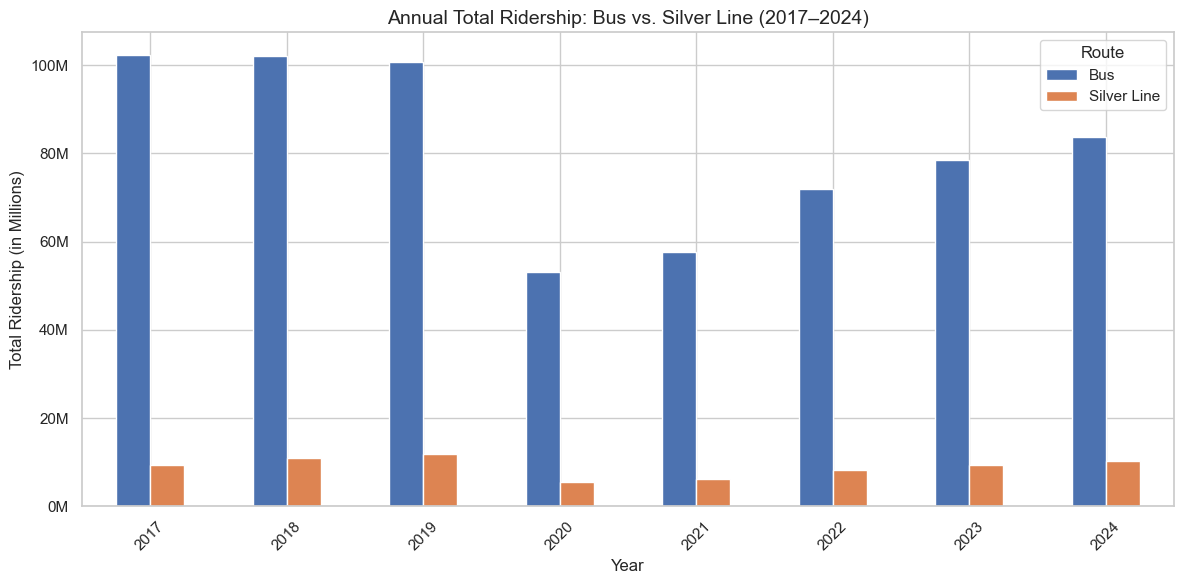

In [9]:
import matplotlib.ticker as ticker

sns.set(style="whitegrid")

# Compute total annual ridership by route_or_line
annual_totals = df.groupby(["year", "route_or_line"])["ridership_total"].sum().reset_index()
annual_pivot = annual_totals.pivot(index="year", columns="route_or_line", values="ridership_total")

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
annual_pivot.plot(kind="bar", stacked=False, ax=ax)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1_000_000:.0f}M")) # Format y-axis in millions

plt.title("Annual Total Ridership: Bus vs. Silver Line (2017–2024)", fontsize=14)
plt.ylabel("Total Ridership (in Millions)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Route")
plt.tight_layout()

plt.show()
